In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy.stats as sps

WT_c= '#888985'
S15_c = '#5AC8E0'
S1_c = '#BC60A5'

In [5]:
df_WT_MI = pd.read_csv('WT_sum_MI.csv', header=None, names=['WT_MI'])
df_S1_MI = pd.read_csv('S1_sum_MI.csv', header=None, names=['S1_MI'])
df_S15_MI = pd.read_csv('S15_sum_MI.csv', header=None, names=['S15_MI'])
df_S1_L56A_MI = pd.read_csv('S1_L56A_sum_MI.csv', header=None, names=['S1_L56A_MI'])
df_S1_V84A_MI = pd.read_csv('S1_V84A_sum_MI.csv', header=None, names=['S1_V84A_MI'])
df_MI_total = pd.concat([df_WT_MI, df_S1_MI, df_S15_MI, df_S1_L56A_MI, df_S1_V84A_MI], axis=1)
print(df_MI_total)

        WT_MI     S1_MI    S15_MI  S1_L56A_MI  S1_V84A_MI
0    0.000063  0.000096  0.000223    0.000090    0.000301
1    0.001453  0.001470  0.001555    0.001136    0.000965
2    0.006569  0.018274  0.011010    0.004412    0.006471
3    0.012876  0.010979  0.016490    0.010190    0.013301
4    0.015002  0.009053  0.007841    0.009754    0.010184
..        ...       ...       ...         ...         ...
128  0.032114  0.011918  0.010392    0.058242    0.047896
129  0.031516  0.005395  0.024758    0.063992    0.040598
130  0.051546  0.006485  0.040499    0.062047    0.041839
131  0.049997  0.023108  0.028367    0.070000    0.031246
132  0.017070  0.008079  0.019776    0.021044    0.031116

[133 rows x 5 columns]


In [6]:
df_MI_total['S1-WT'] = df_MI_total['S1_MI'] - df_MI_total['WT_MI']
df_MI_total['S15-WT'] = df_MI_total['S15_MI'] - df_MI_total['WT_MI']
df_MI_total['S15-S1'] = df_MI_total['S15_MI'] - df_MI_total['S1_MI']
df_MI_total['S1_L56A-S1'] = df_MI_total['S1_L56A_MI'] - df_MI_total['S1_MI']
df_MI_total['S1_V84A-S1'] = df_MI_total['S1_V84A_MI'] - df_MI_total['S1_MI']
print(df_MI_total)

        WT_MI     S1_MI    S15_MI  S1_L56A_MI  S1_V84A_MI     S1-WT    S15-WT  \
0    0.000063  0.000096  0.000223    0.000090    0.000301  0.000034  0.000160   
1    0.001453  0.001470  0.001555    0.001136    0.000965  0.000018  0.000102   
2    0.006569  0.018274  0.011010    0.004412    0.006471  0.011705  0.004441   
3    0.012876  0.010979  0.016490    0.010190    0.013301 -0.001897  0.003614   
4    0.015002  0.009053  0.007841    0.009754    0.010184 -0.005949 -0.007162   
..        ...       ...       ...         ...         ...       ...       ...   
128  0.032114  0.011918  0.010392    0.058242    0.047896 -0.020197 -0.021722   
129  0.031516  0.005395  0.024758    0.063992    0.040598 -0.026121 -0.006759   
130  0.051546  0.006485  0.040499    0.062047    0.041839 -0.045061 -0.011047   
131  0.049997  0.023108  0.028367    0.070000    0.031246 -0.026889 -0.021630   
132  0.017070  0.008079  0.019776    0.021044    0.031116 -0.008991  0.002707   

       S15-S1  S1_L56A-S1  

In [9]:
df_MI_total['WT_MI'].to_csv('WT_sum_MI_final.txt', header=None, index=None, sep=' ', mode='w')
df_MI_total['S1_MI'].to_csv('S1_sum_MI_final.txt', header=None, index=None, sep=' ', mode='w')
df_MI_total['S15_MI'].to_csv('S15_sum_MI_final.txt', header=None, index=None, sep=' ', mode='w')
df_MI_total['S1-WT'].to_csv('S1-WT_MI_final.txt', header=None, index=None, sep=' ', mode='w')
df_MI_total['S15-WT'].to_csv('S15-WT_sum_MI_final.txt', header=None, index=None, sep=' ', mode='w')
df_MI_total['S15-S1'].to_csv('S15-S1_sum_MI_final.txt', header=None, index=None, sep=' ', mode='w')
df_MI_total['S1_L56A_MI'].to_csv('S1_L56A_sum_MI_final.txt', header=None, index=None, sep=' ', mode='w')
df_MI_total['S1_V84A_MI'].to_csv('S1_V84A_sum_MI_final.txt', header=None, index=None, sep=' ', mode='w')
df_MI_total['S1_L56A-S1'].to_csv('S1_L56A-S1_sum_MI_final.txt', header=None, index=None, sep=' ', mode='w')
df_MI_total['S1_V84A-S1'].to_csv('S1_V84A-S1_sum_MI_final.txt', header=None, index=None, sep=' ', mode='w')

In [32]:
print(min(df_MI_total['S1-WT']))
print(min(df_MI_total['S15-WT']))
print(min(df_MI_total['S15-S1']))

print(max(df_MI_total['S1-WT']))
print(max(df_MI_total['S15-WT']))
print(max(df_MI_total['S15-S1']))

-0.0718545816522999
-0.05920740271829096
-0.17158585995331455
0.17059390404339836
0.10866876003285691
0.10937175756547031


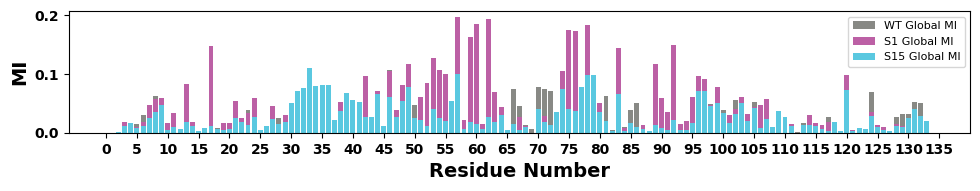

In [33]:
plt.figure(figsize=[10,2])
#plt.scatter( cpmg, [1]*len(cpmg), color='red')

plt.bar(df_MI_total.index+1, df_MI_total['WT_MI'], color='#888985', label='WT Global MI')
plt.bar(df_MI_total.index+1, df_MI_total['S1_MI'],color='#BC60A5', label='S1 Global MI')
plt.bar(df_MI_total.index+1, df_MI_total['S15_MI'], color='#5AC8E0', label='S15 Global MI')

plt.ylabel(r'MI', weight='bold', fontsize=14) 
plt.xlabel('Residue Number',     weight='bold', fontsize=14) 
plt.xticks(np.arange(0,140,5),weight='bold', fontsize=10)
plt.yticks(weight='bold', fontsize=10)
plt.legend(fontsize=8)
plt.tight_layout()
plt.savefig('CPMG.pdf', dpi=300, transparent=True)
plt.show()